# Exercise 3 - Manually Completing PCA

In this exercise we will complete PCA manually for the Iris dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [2]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Selecting on the sepal features

In [3]:
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Compute the covariance matrix for the selected data

In [4]:
data = np.cov(df.values.T)
# The transpose is required to ensure the covariance matrix is based on features, not samples
data

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

Compute the eigenvectors and eigenvalues for the covariance matrix

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

What are the eigenvalues?

In [6]:
eigenvalues

array([0.6887728 , 0.18492474])

Compute the eigenvalues as a percentage of the variance within the dataset.

In [7]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.78834238, 1.        ])

What are the eigenvectors?

In [8]:
eigenvectors

array([[-0.99693955,  0.07817635],
       [ 0.07817635,  0.99693955]])

We want at least 75% of the variance, so we only need to select the principal component?

In [9]:
P = eigenvectors[0]
P

array([-0.99693955,  0.07817635])

Apply the dimensionality reduction

In [10]:
x_t_p = P.dot(df.values.T)
x_t_p

array([-4.81077444, -4.65047471, -4.43545153, -4.34357521, -4.70326285,
       -5.07858577, -4.32012231, -4.71889812, -4.15982257, -4.64265708,
       -5.09422104, -4.51951021, -4.55078076, -4.05231098, -5.46954395,
       -5.33857945, -5.07858577, -4.81077444, -5.38548526, -4.78732154,
       -5.11767394, -4.79513917, -4.30448703, -4.82640971, -4.51951021,
       -4.75016867, -4.71889812, -4.9104684 , -4.91828603, -4.43545153,
       -4.54296312, -5.11767394, -4.86356259, -5.15482681, -4.64265708,
       -4.73453339, -5.20955026, -4.64265708, -4.15200494, -4.81859208,
       -4.71108049, -4.30642234, -4.13636967, -4.71108049, -4.78732154,
       -4.55078076, -4.78732154, -4.33575758, -4.99452708, -4.72671576,
       -6.72841249, -6.13024876, -6.63653617, -5.30336189, -6.26121325,
       -5.46366162, -6.02273717, -4.69738052, -6.35308957, -4.97300948,
       -4.82834502, -5.64741426, -5.80964929, -5.8546198 , -5.35615003,
       -6.43714826, -5.34833239, -5.57117321, -6.0090372 , -5.38

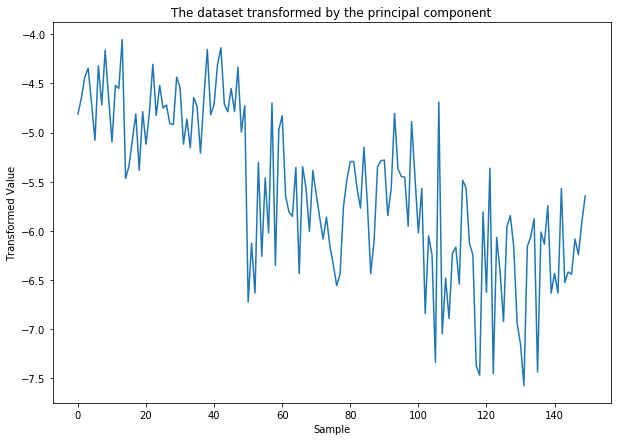

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(x_t_p);
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.title('The dataset transformed by the principal component');